## Init

In [1]:
# %display latex
%matplotlib inline

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout


@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

In [4]:
import matplotlib

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'sans',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "axes.labelsize": 8,
    "font.size": 8,
})
textwidth = 6.26894

## Model

In [6]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [7]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [8]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-3p8ii69p.py"' ...


In [9]:
u = (x, y) = reversed(s.x)

In [10]:
vf = vector(reversed(s.y)); vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [12]:
v2 = [RIF(1,1.2), RIF(4,6)]
v3 = v2 # [RIF(1,1.1), RIF(4,5)]
v4 = [RIF(0.2, 0.4), RIF(7, 8)]
v5 = [RIF(0.4, 1.0), RIF(6, 7)]
v6 = [RIF(0.2, 0.6), RIF(2, 3)]

## Double start jump

In [14]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [15]:
Qbox = [RIF(0, 0.3), RIF(1.75, 3.5)]

In [16]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

## First prop

In [19]:
s1 = m.process("[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-b7fu0gqf.py"' ...


In [20]:
s2 = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-iooddp02.py"' ...


In [22]:
kwargs = dict(step=(0.01, 0.1), order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2, symbolic_composition=True)

In [25]:
def S(k):
    return Atomic(var("Whelk") >= (1/8)*var("Lobster") + k)

Computed 113 flowpipes in 1.4069570360152284 sec


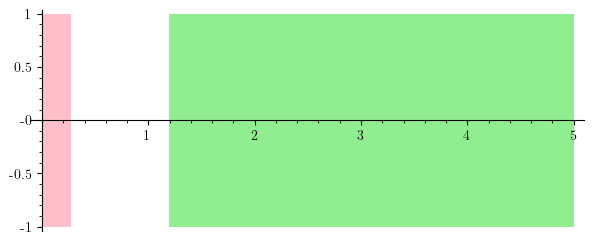

In [26]:
S(1).signal_for_system(s2, 5, **kwargs).plot()

Computed 113 flowpipes in 1.384203982015606 sec


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


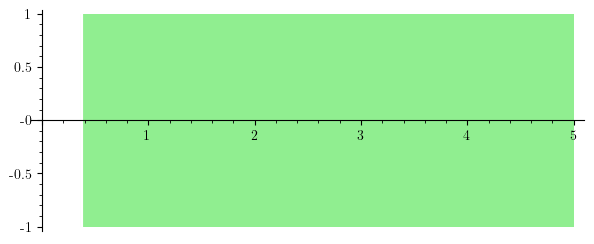

In [27]:
S(0.6).signal_for_system(s2, 5, **kwargs).plot()

Computed 113 flowpipes in 1.3065577640227275 sec


/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


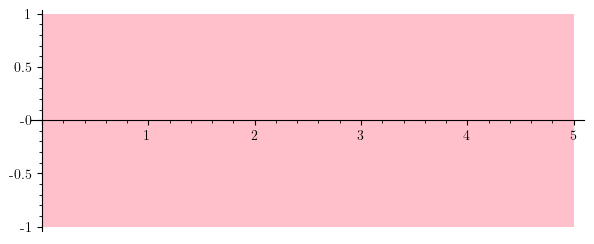

In [28]:
S(1.6).signal_for_system(s2, 5, **kwargs).plot()

In [ ]:
sigs = []
for k in srange(0.9, 1.6, 0.1, include_endpoint=True):
    with suppress_stdout():
        sigs.append(G(1, S(k)).signal_for_system(s2, 5, **kwargs))
graphics_array([[sig.plot()] for sig in sigs])

In [ ]:
sigs = []
for k in srange(0.9, 1.6, 0.1, include_endpoint=True):
    with suppress_stdout():
        sigs.append(G(1, S(k)).signal_for_system(s2, 5, **kwargs).to_mask_and())
graphics_array([[sig.plot()] for sig in sigs])

In [ ]:
S(0.4).signal_for_system(s2, 5, **kwargs)

In [ ]:
S(3).signal_for_system(s2, 5, **kwargs).plot()

## Performance experiments

In [ ]:
from time import perf_counter

In [ ]:
def monitoring_result(system, prop, duration=0, **kwargs):
    print(f"monitoring {prop} with use_masks = {kwargs.get('use_masks', False)} ...")
    t0 = perf_counter()
    sig = prop.signal_for_system(system, duration, **kwargs)
    t1 = perf_counter()
    print(f"done in {t1 - t0} sec")
    return sig, t1 - t0

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tikzplotlib

### Iterated Masking

In [ ]:
props = [
    "[0.05, 0.1] Whelk" >> G(RIF(0,0.2), ~P),
    G(RIF(10.2, 10.3), ("[0.05,0.1] Whelk" >> F(RIF(0,0.2), ~P))),
    F(RIF(5, 5.1),
         "[1, 1.5] Lobster" >>
         G(RIF(10.2, 10.3),
           "[0.05, 0.1] Whelk" >>
            F(RIF(0,0.2), ~P))),
    G(RIF(2, 2.5),
         "[0.1, 0.2] Whelk" >>
         F(RIF(5, 5.1),
           "[1, 1.5] Lobster" >>
           G(RIF(10.2, 10.3),
             "[0.05, 0.1] Whelk" >>
             F(RIF(0,0.2), ~P))))
]

In [ ]:
props = [
    F(RIF(0, 5), P),
    G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)),
    G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P))),
    G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)))),
    G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P))))),
    G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), "[1, 1.5] Lobster" >> F(RIF(0, 5), P)))))),
#    G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5,5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5, 5.1]'), "[1, 1.5] Lobster" >> G(RIF('[5, 5.1]'), "[0.5, 0.6] Whelk" >> G(RIF('[5,5.1]'), P)))))),
]

In [ ]:
props

In [ ]:
res = monitoring_result(s2, props[2], 2, use_masks=True, **kwargs)

In [ ]:
res

In [ ]:
monitoring_result(s2, props[2], use_masks=False, **kwargs)

In [ ]:
ress_unmasked = [
    monitoring_result(s2, prop, 1, use_masks=False, **kwargs)
    for prop in props
]
ress_masked = [
    monitoring_result(s2, prop, 1, use_masks=True, **kwargs)
    for prop in props
]

In [ ]:
table([[t, s(0)] for s, t in ress_unmasked])

In [ ]:
table([[t, s(0)] for s, t in ress_masked])

In [ ]:
ress = pd.DataFrame(
    [[i, t1, t2] for i, ((_, t1), (_, t2)) in enumerate(zip(ress_unmasked, ress_masked), 0)],
    columns = ['Depth', 'Unmasked Time (sec)', 'Masked Time (sec)']
)

In [ ]:
ress

In [ ]:
ress.to_csv('alternation-depth-monitoring-times.csv', sep="\t", index=False)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(0.7*textwidth, 0.45*textwidth)
ress.plot.line('Depth', ['Unmasked Time', 'Masked Time'], logy=True, ax=ax)
plt.ylabel("Monitoring Time (sec)")
plt.grid(True, which="both", ls="-")
plt.savefig("alternation-depth-monitoring-times.pdf", bbox_inches='tight')
plt.savefig("alternation-depth-monitoring-times.pgf", bbox_inches='tight')
tikzplotlib.save('alternation-depth-monitoring-times.tex')

In [51]:
ress.plot('Depth', ['Unmasked Time', 'Masked Time'], 'line', logy=True)

### Eventually window monitoring time impact

In [52]:
def alter_prop(k):
    return F(RIF(10 - k, 10), "[0.05, 0.1] Whelk" >> G(RIF(0,1), ~P))

In [53]:
srange(0, 10, 1, include_endpoint=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [54]:
res_alter = [
    (i, k, monitoring_result(s2, alter_prop(k),
                      use_masks=masking, **kwargs), masking)
    for i in range(0, 10)
    for masking in [False, True]
    for k in srange(0, 10, 0.5, include_endpoint=True)
]

monitoring F(10, [0.05, 0.1] Whelk >> G([0 .. 1], ~(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = False ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.05, 0.1] Whelk)" "/tmp/bond-sage-script-9zl3nn0d.py"' ...
Running cmd: 'savesage "[0.05, 0.1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-701dykdk.py"' ...
moving [0.0000000000000000 .. -0.0000000000000

Computed 41 flowpipes in 0.4548984080029186 sec
In G.signal
mask for G = None
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7efd79ca7b80>, 0, symbolic_composition=True, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.43 seconds
roots = [[0.0000000000000000 .. 1.0059999999990000]]
domain = [0.0000000000000000 .. 1.0060000000000001]
roots = [[0.0000000000000000 .. 1.0059999999990000]]
seg_domain = [0.0000000000000000 .. 1.0060000000000001]
roots = [[0.0000000000000000 .. 1.0059999999990000]]
signal given bool roots: 1 items in 0.00 seconds
y0=[[-0.066974794929165027 .. 1.4746898389721977], [1.1810735045161602 .. 1.5062116783842164]]
y0_ctx=[None, [0.049999999999999995 .. 0.10000000000000001]]
phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[-0.066974794929165027 .. 1.4746898389721977], [1.181073

limit_output extension: Maximum message size of 10000 exceeded with 10153 characters

In [55]:
repr(res_alter[0])

'(0, 0.000000000000000, (Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=None), 14.656591858001775), False)'

In [56]:
res_alter1 = {(i, k, m): t for (i, k, (_, t), m) in res_alter}

In [57]:
alter_df = pd.DataFrame(
    [[k, i, res_alter1[(i, k, False)], res_alter1[(i, k, True)]]
     for i in srange(0, 10)
     for k in srange(0, 10, 0.5, include_endpoint=True)],
    columns = ['k', 'i', 'Unmasked Time', 'Masked Time']
); alter_df

,k,i,Unmasked Time,Masked Time
0,0.000000000000000,0,14.656592,2.215572
1,0.500000000000000,0,14.585495,2.343494
2,1.00000000000000,0,14.516241,2.501639
3,1.50000000000000,0,14.510579,2.616813
4,2.00000000000000,0,14.557606,2.713406
...,...,...,...,...
205,8.00000000000000,9,15.582330,5.310618
206,8.50000000000000,9,15.586728,15.754556
207,9.00000000000000,9,15.129555,18.775114
208,9.50000000000000,9,15.272939,15.185740


In [58]:
alter_df.groupby("k").std()

,Unmasked Time,Masked Time
k,,
0.000000000000000,0.278624,0.021637
0.500000000000000,0.232335,0.024742
1.00000000000000,0.288769,0.025662
1.50000000000000,0.229079,0.059827
2.00000000000000,0.210276,0.078462
2.50000000000000,0.243953,0.059752
3.00000000000000,0.175472,0.041447
3.50000000000000,0.234512,0.046171
4.00000000000000,0.222880,0.033325


In [59]:
alter_df_grouped = alter_df.groupby("k").mean(); alter_df_grouped

,Unmasked Time,Masked Time
k,,
0.000000000000000,15.049564,2.237590
0.500000000000000,15.030416,2.374673
1.00000000000000,15.061430,2.509291
1.50000000000000,15.022623,2.681504
2.00000000000000,14.966686,2.792237
2.50000000000000,14.979133,2.931800
3.00000000000000,14.985180,3.042932
3.50000000000000,14.923129,3.193625
4.00000000000000,15.028561,3.307151


In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(0.45*textwidth, 0.45*textwidth)
alter_df_grouped.plot(ylim=(0,18), ax=ax, legend=False)
#alter_df_grouped.plot(y='Unmasked Time', ylim=(0,18),ax=ax)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(
       FuncFormatter(lambda num, pos: "%.1f" % (num // 2))
)
plt.ylabel("$k$")
plt.ylabel("Monitoring Time (sec)")
plt.savefig('masked-unmasked-monitoring.pdf', bbox_inches='tight')
plt.savefig('masked-unmasked-monitoring.pgf', bbox_inches='tight')
tikzplotlib.save('masked-unmasked-monitoring.tex')
show(fig)

<Figure size 203.114x203.114 with 1 Axes>

### or-masking window impact

In [61]:
prop = F(RIF(0, 1), "[0.05, 0.1] Whelk" >> G(RIF(0,10), ~P))

In [62]:
ress2_raw = [
    (i, k, monitoring_result(s2, G(1, S(k)) & prop, 5, use_masks=masking, **kwargs), masking)
    for i in range(0, 10)
    for masking in [False, True]
    for k in srange(0.9, 1.6, 0.1, include_endpoint=True)
]

monitoring G(1, Whelk >= 1/8*Lobster + 0.900000000000000) & F([0 .. 1], [0.05, 0.1] Whelk >> G([0 .. 10], ~(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))) with use_masks = False ...
Running cmd: 'savesage "([-1 .. 1] Lobster || [-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0.05, 0.1] Whelk)" "/tmp/bond-sage-script-if1ljkc_.py"' ...
Running cmd: 'savesage "[0.05, 0.1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-rnnc52ok

Computed 141 flowpipes in 1.5343375340016792 sec
In G.signal
mask for G = None
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7efd79d7d5e0>, 0, symbolic_composition=True, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.41 seconds
roots = [[0.0000000000000000 .. 1.3914413632230840]]
domain = [0.0000000000000000 .. 10.006000000000003]
roots = [[0.0000000000000000 .. 1.3914413632230840]]
seg_domain = [0.0000000000000000 .. 10.006000000000003]
roots = [[0.0000000000000000 .. 1.3914413632230840]]
signal given bool roots: 1 items in 0.01 seconds
y0=[[-0.081526428912026828 .. 1.0853562506643189], [1.1077231457603111 .. 1.4352108440562963]]
y0_ctx=[None, [0.049999999999999995 .. 0.10000000000000001]]
phi variables sfs = {x1, x0}
system sfs = System(R, (x0, x1), [[-0.081526428912026828 .. 1.0853562506643189], [1.10772

limit_output extension: Maximum message size of 10000 exceeded with 10137 characters

In [63]:
ress2_dict = {(i, k, m): t for (i, k, (_, t), m) in ress2_raw}

In [64]:
ress2_df = pd.DataFrame(
    [[k, i, ress2_dict[(i, k, False)], ress2_dict[(i, k, True)]]
     for i in srange(0, 10)
     for k in srange(0.9, 1.6, 0.1, include_endpoint=True)],
    columns = ['k', 'i', 'Unmasked Time (sec)', 'Masked Time (sec)']
); ress2_df

,k,i,Unmasked Time (sec),Masked Time (sec)
0,0.900000000000000,0,13.716763,13.291059
1,1.00000000000000,0,13.421950,13.263275
2,1.10000000000000,0,13.566277,10.163172
3,1.20000000000000,0,13.449452,12.792007
4,1.30000000000000,0,13.384174,8.858117
...,...,...,...,...
75,1.20000000000000,9,12.947254,12.283637
76,1.30000000000000,9,13.029197,8.544361
77,1.40000000000000,9,13.354040,7.879996
78,1.50000000000000,9,13.145697,1.970241


In [65]:
ress2_df.groupby("k").std()

,Unmasked Time (sec),Masked Time (sec)
k,,
0.900000000000000,0.207804,0.185411
1.00000000000000,0.162295,0.188148
1.10000000000000,0.100037,0.166225
1.20000000000000,0.196254,0.206910
1.30000000000000,0.189679,0.184346
1.40000000000000,0.193700,0.112343
1.50000000000000,0.214382,0.027168
1.60000000000000,0.158071,0.037394


In [66]:
ress2_grouped = ress2_df.groupby("k").mean(); ress2_grouped

,Unmasked Time (sec),Masked Time (sec)
k,,
0.900000000000000,13.296967,13.103087
1.00000000000000,13.324469,13.118151
1.10000000000000,13.389003,10.036142
1.20000000000000,13.340059,12.529569
1.30000000000000,13.276967,8.711169
1.40000000000000,13.242474,7.828625
1.50000000000000,13.240375,2.010100
1.60000000000000,13.196788,1.726491


In [67]:
ress2_grouped.plot()

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(0.45*textwidth, 0.45*textwidth)
ress2_grouped.plot(ylim=(0, 14), ax=ax, legend=False)
#alter_df_grouped.plot(y='Unmasked Time', ylim=(0,18),ax=ax)
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(
       FuncFormatter(lambda num, pos: "%.1f" % (0.9 + 0.1*num))
)
plt.xlabel("$m$")
plt.ylabel("Monitoring Time (sec)")
plt.savefig('masked-unmasked-monitoring-and.pdf', bbox_inches='tight')
plt.savefig('masked-unmasked-monitoring-and.pgf', bbox_inches='tight')
tikzplotlib.save('masked-unmasked-monitoring-and.tex')
show(fig)

<Figure size 203.114x203.114 with 1 Axes>